Dieser Quellcode ist Bestandteil der Dissertation von Ines Reinecke
vorgelegt am 11.07.2023 der Technischen Universität Dresden, Medizinische Fakultät

Dieser Code enthält 

* Visualisierung der Übereinstimmung der Ergebnisse der Algorithmen auf die Medikationsverordnungen
* Visualisierung Venn Diagramm, Abbildung 4.9, Kapitel Ergebnisse, Maßnahmen - Datenstruktur, Algorithmen (Kapitel 4.4.2.1)

In [1]:


import pandas as pd
import numpy as np
import os
#from fuzzywuzzy import fuzz, process
import re
from typing import List
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles
import matplotlib as mpl

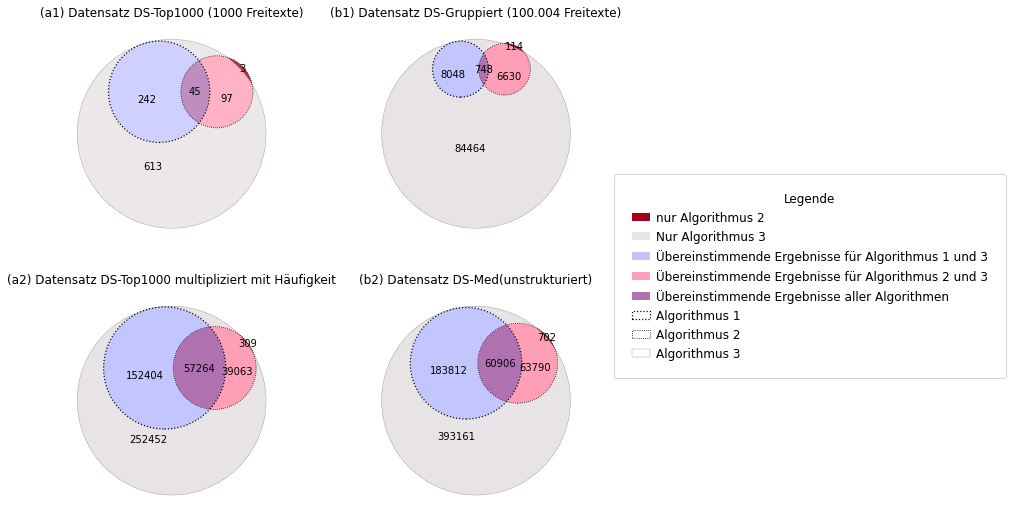

In [3]:
#Visulization of match rates between algorithm1, 2 and 3 - that illustrates same results
figure, axes = plt.subplots(2, 2, figsize=(10,9))



v1000U=(0, 3, 0, 613, 242, 97, 45)
v2AllU=(0, 114, 0, 84464, 8048, 6630, 748)
v31000A=(0, 309, 0, 252452, 152404, 39063, 57264)
v4AllA=(0, 702, 0, 393161, 183812, 63790, 60906)


v1=venn3(v1000U, set_labels = ('', '', ''),set_colors=('#2e37b6', '#a2001d','#e8e3e5'),alpha=(0.8), ax=axes[0][0])
v1=venn3_circles(v1000U, linestyle='dotted', linewidth=1,ax=axes[0][0])

#a2001d

v2=venn3(v2AllU, set_labels = ('', '', ''),set_colors=('#2e37b6', '#a2001d','#e8e3e5'),alpha = 1,ax=axes[0][1])
v2=venn3_circles(v2AllU, linestyle='dotted', linewidth=1,ax=axes[0][1])

v3=venn3(v31000A, set_labels = ('', '', ''),set_colors=('#2e37b6', '#a2001d','#e8e3e5'),alpha = 1,ax=axes[1][0])
v3=venn3_circles(v31000A, linestyle='dotted', linewidth=1,ax=axes[1][0])

v4=venn3(v4AllA, set_labels = ('', '', ''),set_colors=('#2e37b6', '#a2001d','#e8e3e5'),alpha = 1,ax=axes[1][1], )
v4=venn3_circles(v4AllA, linestyle='dotted', linewidth=1,ax=axes[1][1])

v1[0].set_lw(1.2)
v1[1].set_lw(0.8)
v1[2].set_lw(0.4)

v2[0].set_lw(1.2)
v2[1].set_lw(0.8)
v2[2].set_lw(0.4)

v3[0].set_lw(1.2)
v3[1].set_lw(0.8)
v3[2].set_lw(0.4)

v4[0].set_lw(1.2)
v4[1].set_lw(0.8)
v4[2].set_lw(0.4)
#axes[1,1].axis('off')

axes[0, 0].set_title("(a1) Datensatz DS-Top1000 (1000 Freitexte)").set_fontsize(12)
axes[0, 1].set_title("(b1) Datensatz DS-Gruppiert (100.004 Freitexte)").set_fontsize(12)
axes[1, 0].set_title("(a2) Datensatz DS-Top1000 multipliziert mit Häufigkeit").set_fontsize(12)
axes[1, 1].set_title("(b2) Datensatz DS-Med(unstrukturiert)").set_fontsize(12)

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'


font1 = {'family':'sans-serif','color':'black','size':16} # use for title

legend_title = "Legende"
legend_fontsize = 12
legend_position = (2, 0.6) # Legende oberhalb des Diagramms platzieren
legend_alignment = "left"

plt.legend(['nur Algorithmus 2', 'Nur Algorithmus 3', 'Übereinstimmende Ergebnisse für Algorithmus 1 und 3',
            'Übereinstimmende Ergebnisse für Algorithmus 2 und 3', 'Übereinstimmende Ergebnisse aller Algorithmen', 
            'Algorithmus 1', 'Algorithmus 2','Algorithmus 3'],
           loc='lower center',
           bbox_to_anchor=legend_position,
           title=legend_title,
           title_fontsize=legend_fontsize,
           prop={'size': 12},
           borderaxespad=0.,
           labelspacing=0.5,
           handlelength=1.5,
           handletextpad=0.5,
           borderpad=1.5,
           frameon=True)

plt.setp(plt.gca().get_legend().get_title(), fontsize=legend_fontsize) # Anpassen der Titelgröße
plt.setp(plt.gca().get_legend().get_title(), ha=legend_alignment) # Anpassen der Titelbündigkeit


#plt.legend(['nur Algorithmus 2', 'Nur Algorithmus 3', 'Übereinstimmende Ergebnisse für Algorithmus 1 und 3','Übereinstimmende Ergebnisse für Algorithmus 2 und 3', 'Übereinstimmende Ergebnisse aller Algorithmen', 'Algorithmus 1', 'Algorithmus 2','Algorithmus 3'],loc='right',bbox_to_anchor=(2.5, 1.5), prop={'size': 12}, title='Legende')


#plt.show()
plt.savefig('../data_results/01_data_structure_results/venn_match_algo_german.png', dpi=400,bbox_inches='tight')